# __Sequential API in TensorFlow__
The sequential API in TensorFlow offers a high-level interface for building and training deep learning models. It allows for the sequential addition of layers, simplifying the process of constructing neural network architectures by specifying the input shape and layer type.


## Steps to be followed:
1. Import the required libraries
2. Load the dataset
3. Display training images
4. Build the model
5. Evaluate the model
6. Predict the model

### Step 1: Import the Required Libraries
- Import the necessary libraries for plotting with Matplotlib, TensorFlow, and NumPy.

- The import statement __import matplotlib.pyplot as plt__ imports the Matplotlib library, enabling the creation of plots and visualizations.
- Importing TensorFlow as tf allows access to the TensorFlow library, a renowned deep learning framework.
- The line __layers = tf.keras.layers__ imports the layers module from the TensorFlow Keras API. This module furnishes a range of pre-built layers for constructing neural network models.
- Importing __numpy as np__ provides support for arrays and mathematical operations within the NumPy library.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
layers = tf.keras.layers
import numpy as np


### Step 2: Loading the Dataset
- The __mnist = tf.keras.datasets.fashion_mnist__ statement loads the Fashion MNIST dataset, a collection of images that depict various fashion items.

- The dataset is split into two parts: the training set and the testing set.
- The training set contains images utilized for training a machine learning model, while the testing set is employed to evaluate the model's performance.
- To prepare the images for training, the pixel values undergo normalization. This entails scaling down the pixel values, which range from 0 to 255 and represent different shades of gray, to a range between 0 and 1.
- This normalization step facilitates more effective learning by making the input data consistent and easier to work with for the model.

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train.shape

(60000, 28, 28)

### Step 3: Displaying Training Images
- It is used to display a grid of 25 images from the Fashion MNIST dataset, which contains different clothing items like T-shirts, trousers, dresses, etc.
- Each image is shown in a subplot with 5 rows and 5 columns, forming a 5x5 grid.
- The **x_train** array contains the pixel values of the images, which are divided by 255.0 to normalize them between 0 and 1 for better visualization.
- The corresponding labels from the **y_train** array are used to display the name of the clothing item below each image in the grid.

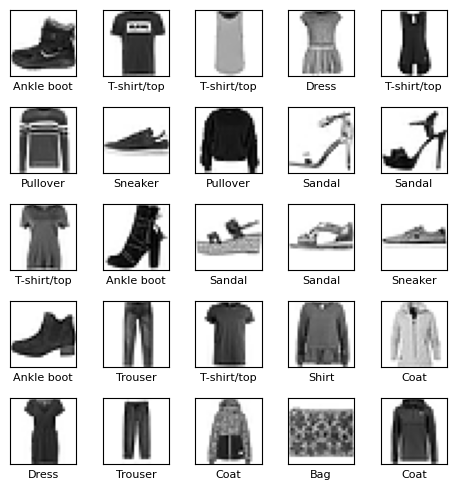

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]], fontsize=8)
    plt.tight_layout()
plt.show()

**Observations:**
- The output of the code is a grid of 25 images, each representing a clothing item from the Fashion MNIST dataset.

- Each image is displayed in a subplot, forming a 5x5 grid.
- The **plt.imshow()** function is used to show the image, with the **cmap=plt.cm.binary** argument setting the color map to binary, which displays the image in grayscale.
- The **plt.xlabel()** function is used to display the label of the clothing item below each image.
- The grid is displayed using **plt.show()**, showing the images along with their corresponding labels in the specified layout.
- The output allows us to visually explore a subset of the Fashion MNIST dataset, gaining insights into different clothing items and their corresponding labels.

### Step 4: Build the model
- Define a sequential model in TensorFlow, which is a linear stack of layers.
- The model consists of a flatten layer to reshape the input data, two dense layers with a ReLU activation function to introduce non-linearity, and a dense output layer with a softmax activation function for multi-class classification.

<br>

Declare a model wit the following layers:
1. Flatten
2. Dense, 64 nodes, activation = 'relu'
2. Dense, 64 nodes, activation = 'relu'
2. Dense, 10 nodes, activation = 'softmax'

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=None)
])

### Step 5: Compiling the Model
- The **compile** function prepares the model for training by specifying the optimization method, loss function, and the evaluation metrics.
- The **fit** function trains the model using the training data. It iterates over the dataset a certain number of times (epochs) and adjusts the model's internal parameters to minimize the loss function. This process helps the model learn and improve its ability to predict the correct outputs.

<br>

Compile the model with Adam optimizer, 'sparse_categorical_crossentropy' loss and 'accuracy' metrics. Then fit using 5 epochs.

In [24]:
# Note: the default batch size = 32

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])


**Observations:**
- The output shows the training progress of the model over five epochs.
- For each epoch, it displays the loss value (indicating how well the model is performing) and the accuracy (how accurately the model predicts the training data).

### Step 6: Evaluating the Model
- The **model.evaluate(x_test, y_test)** is used to evaluate the trained model on the test dataset.
- It computes the loss value and metrics (such as accuracy) of the model's performance on the test data.

In [26]:
model.fit(x_train, y_train, epochs=100, verbose=0)

**Observations:**
- The first number, __0.3656__, represents the average loss or error of the model's predictions compared to the actual results on the test data. A lower value indicates better accuracy.
- The second number, __0.8678__, represents the accuracy of the model on the test data. It shows the proportion of correctly predicted results out of all the test samples. A higher value indicates better performance.

### Step 7: Predicting the Model
- The **model.predict(x_test)** line predicts the labels for the test dataset **x_test** using the trained model. It returns a set of predicted probabilities for each class in the dataset.

- The **predicted_label** variable extracts the predicted label for the first sample in the test dataset.
- It uses **np.argmax(predictions[0])** to find the index of the class with the highest probability and then retrieves the corresponding class name from the **class_names** list.
- The subsequent **print** statements display the actual label and the predicted label for the first sample in the test dataset.

In [29]:
predictions = model.predict(x_test, verbose=0)

In [30]:
predictions[0]

array([-120.20592 , -116.07169 ,  -87.550705,  -81.08425 ,  -94.81387 ,
        -21.176395,  -42.34705 ,    4.93795 ,  -35.65737 ,   33.064114],
      dtype=float32)

In [31]:
np.argmax(predictions[0])

np.int64(9)

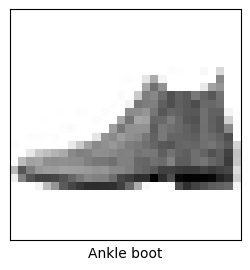

In [32]:
ind = 0

plt.figure(figsize=(3,3))
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.imshow(x_test[ind], cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[ind]])

plt.show()


In [33]:
predicted_label = np.argmax(predictions[0])
print('Predicted label:', predicted_label)

Predicted label: 9


**Observation:**

- The actual label for the first sample in the test dataset is **Ankle boot**, and the model's predicted label for the same sample is also **Ankle boot**.

It prints the actual label of the second sample in the test dataset.
It prints the predicted label for the second sample.

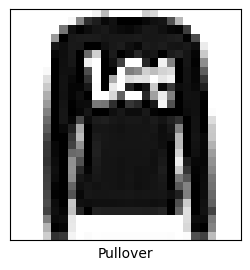

In [34]:
ind = 1

plt.figure(figsize=(3,3))
plt.xticks([])

plt.yticks([])
plt.grid(False)

plt.imshow(x_test[ind], cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[ind]])

plt.show()

In [37]:
predicted_label = np.argmax(predictions[1])
print('Predicted label:', predicted_label, 'Actual label:', y_test[1])
print('Class name:', class_names[predicted_label])

Predicted label: 2 Actual label: 2
Class name: Pullover


**Observation:**

- The actual label for the first sample in the test dataset is **Pullover**, and the model's predicted label for the same sample is also **Pullover**.